# Introduction

We will be covering Python implementations of most of the topics discussed in class. Jupyter notebooks will be the primary mode for demonstrations. I will also be using Python scripts for writing functions. In this notebook, we will setup a conda environment for the class and cover a simple logistic regression example.


There are couple of things to keep in mind when switching from R to Python:

1. Indexing: 
    - Indexing begins from 0 instead of 1.
    - Python also supports negative indexing, i.e. indexing from the rear.
    ```Python
    # List with 5 elements
    l = [1,2.0,3.5,4.6,7.8]
    
    print(l[0]) # first element - 1
    print(l[1]) # second element - 2.0
    
    # negative indexing 
    print(l[-1]) # last element - 7.8
    print(l[-3]) # third element from the end - 3.5
    ```
    
2. Indentation: Instead of curly brackets {}, indents are used to demarcate blocks. For example, nested for loops:

**R**:

```R
for (i in 0:9) {
for(j in 0:2){
    if (i<j){
    sprintf("%d < %d",i,j)
    }
}
}
```

**Python**:
```Python
for i in range(10):
    for j in range(3):
        if i<j:
            print("%d < %d" %(i,j))
```


## Overview of libraries

| Purpose                  | Libraries                      |
|:-------------------------|:-------------------------------|
| Data storage             | numpy, pandas                  |
| Random number generation | numpy, scipy                   |
| Statistical functions    | numpy, scipy                   |
| Plots                    | matplotlib, seaborn, alepython |
| Models                   | statsmodels, scikit-learn      |
| Modeling utilites        | scikit-learn                   |


# Logistic regression (Car marketing study)

Notes 1 slide 6

The data in `Car.csv` are car purchasing behavior for n = 33 households from a marketing survey. The response is binary (1 if a household purchased a car; 0 otherwise). We will be using the `statsmodels` library to train a logistic regression model.

**Attribute information**:
    
    1. y: Binary response variable
    2. income: Household income (thousands)
    3. car_age: Age of oldest automobile

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Magic command Needed for showing plots in jupyter notebooks
%matplotlib inline

In [2]:
# Adjust plot dpi and other graphical parameters
plt.rcParams['figure.dpi'] = 150

In [3]:
# read car data - replace filedir with the actual location
filedir = '../data'

car = pd.read_csv(os.path.join(filedir,'Car.csv'))
# show first five rows
car.head()

,y,income,car_age
0,0,32,3
1,0,45,2
2,1,60,2
3,0,53,1
4,0,25,4


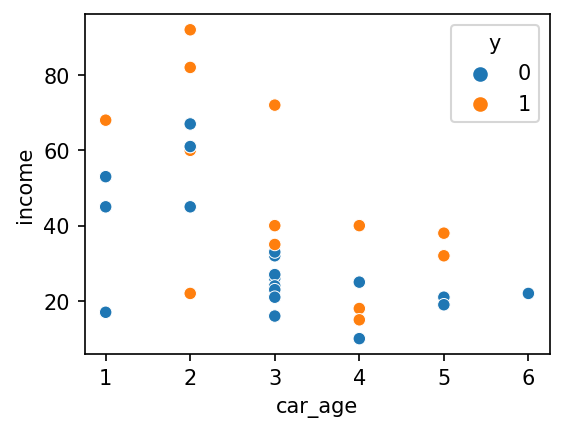

In [4]:
# scatter plot using seaborn
fig = plt.figure(figsize=(4,3))
g = sns.scatterplot(
    data=car,
    x='car_age',
    y='income',
    hue='y',# color points by category
)

In [5]:
# prepare data
y = car['y']

# add constant column to dependent variables
# need to calculate the intercept term
X = sm.add_constant(car[['income','car_age']],prepend=True)

/Users/surajys/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2629: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
X

,const,income,car_age
0,1.0,32,3
1,1.0,45,2
2,1.0,60,2
3,1.0,53,1
4,1.0,25,4
5,1.0,68,1
6,1.0,82,2
7,1.0,38,5
8,1.0,67,2
9,1.0,92,2


In [7]:
# fit logistic regression model
glm_binom = sm.GLM(y,X,family=sm.families.Binomial()).fit()
print(glm_binom.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   33
Model:                            GLM   Df Residuals:                       30
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.345
Date:                Wed, 11 Jan 2023   Deviance:                       36.690
Time:                        11:16:06   Pearson chi2:                     33.6
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7393      2.102     -2.255      0.0

In [8]:
# extract parameters
glm_binom.params

const     -4.739309
income     0.067733
car_age    0.598632
dtype: float64

In [ ]:
glm_binom.tvalues

In [9]:
# extract std error
cov = glm_binom.cov_params() # covariance matrix
cov_diag = np.diag(cov) # extract the diagonal elements - variances
std_err = pd.Series(
    np.sqrt(cov_diag), # sqrt of variance,
    index=cov.columns # label the entires
)
std_err

const      2.101948
income     0.028057
car_age    0.390065
dtype: float64

In [10]:
# tvalues
glm_binom.tvalues

const     -2.254723
income     2.414126
car_age    1.534695
dtype: float64

In [ ]:
# extract statistics
print('AIC: %5.3f'%glm_binom.aic)
print('Log-likelihood: %5.3f' % (-glm_binom.deviance/2))
print('')

In [11]:
# in-sample prediction probablities
p_hat = glm_binom.predict(X)
p_hat

0     0.315189
1     0.378933
2     0.627594
3     0.365667
4     0.342659
5     0.614232
6     0.882054
7     0.695865
8     0.730278
9     0.936395
10    0.873618
11    0.419758
12    0.234627
13    0.590134
14    0.329988
15    0.251108
16    0.643283
17    0.134739
18    0.244975
19    0.584821
20    0.247008
21    0.360597
22    0.441738
23    0.158763
24    0.211179
25    0.209359
26    0.200117
27    0.387168
28    0.113858
29    0.643283
30    0.179310
31    0.603792
32    0.047915
dtype: float64

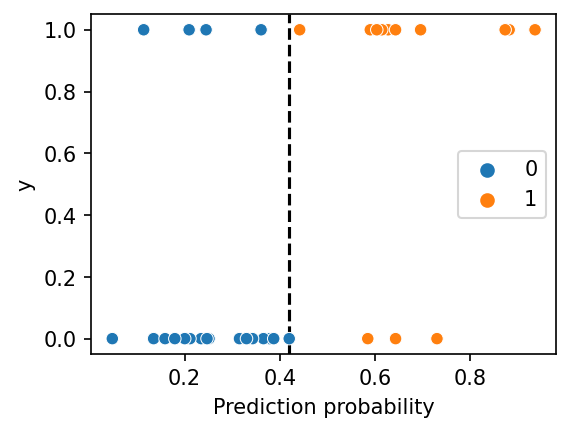

In [15]:
# predictions - specify a threshold 
threshold = 0.42
y_pred = 1*(p_hat>=threshold)

# plot predictions and p_hat
fig,ax = plt.subplots(1,1,figsize=(4,3))
g = sns.scatterplot(x=p_hat,y=y,hue=y_pred,ax=ax) 
_ = g.legend(loc='center right') # change legend location
_ = g.axvline(threshold,ls='--',zorder=0,color='black') # vertical line for threshold

# set x-axis labels
_ = g.set_xlabel('Prediction probability')

**Sanity check**: compute log-likelihood of dataset and compare with the model

$$
\log\mathcal{L} = \sum_{i=1}^{N}\left(y_i\log(p_i) + (1-y_i)\log(1-p_i) \right)
$$

In [ ]:
# SANITY-check: manually calculate log-likelihood and compare with model
log_lik = np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))
print('%.3f'%log_lik)